# Fashion mnist

import numpy as npNotebook para desarrollar una red neuronal convolucional utilizando el dataset fashion mnist.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Importación de los datos para poder trabajar con ellos. Se encuentra dentro de keras

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(X_full_train, y_full_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# Esta es la lista a la que pertenece la clase. Además, coincide con el número de cada imagen
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
X_full_train.shape, y_full_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Exploración y limpieza de los datos

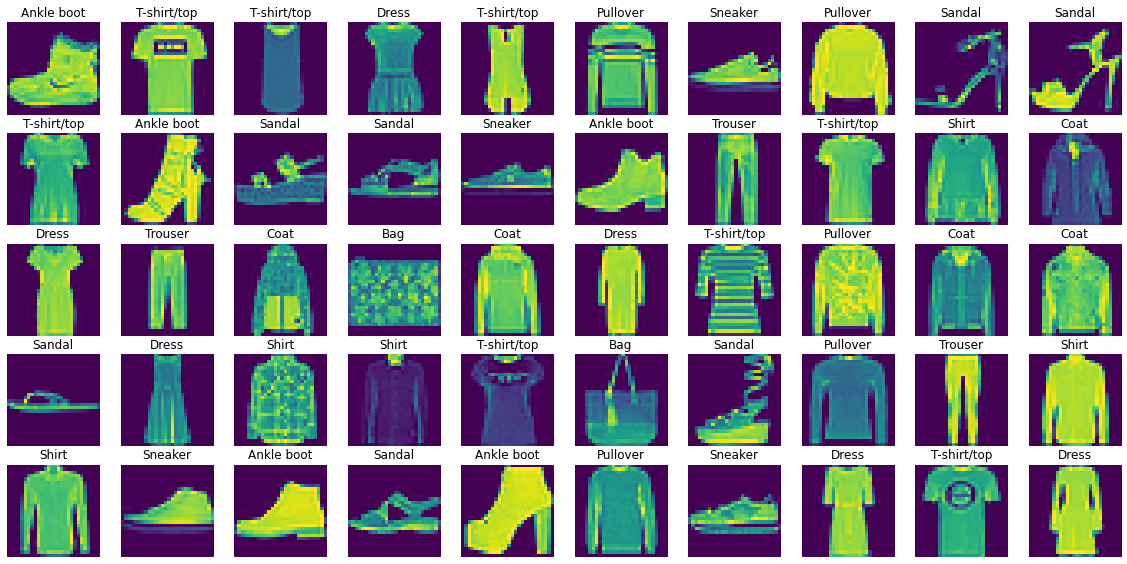

In [6]:
# Visualización de 50 imágenes del dataset
plt.figure(figsize=(20, 20))

for i in range(50):
    plt.subplot(10, 10, i + 1)
    plt.title(class_names[y_full_train[i]])
    plt.xticks([])
    plt.yticks([])
    plt.axis(False)
    plt.imshow(X_full_train[i])

plt.show()

Vamos a comprobar si el dataset está balanceado.

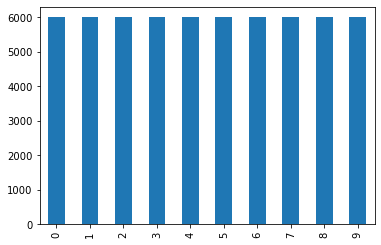

In [7]:
df_labels = pd.DataFrame(y_full_train, columns=['label'])

df_labels.label.value_counts().plot(kind='bar');

Podemos ver que el dataset está balanceado.

El siguiente paso sería normalizar los datos del dataset, ya que actualmente tiene valores entre 0 y 255. Lo transformaremos para que tenga valores entre 0 - 1.

In [8]:
X_full_train.max(), X_test.max(), X_full_train.min(), X_test.min()

(255, 255, 0, 0)

In [9]:
X_full_train = X_full_train / 255.
X_test = X_test / 255.

In [10]:
X_full_train.max(), X_test.max(), X_full_train.min(), X_test.min()

(1.0, 1.0, 0.0, 0.0)

Una vez tenemos el dataset normalizado, necesitamos subdividir nuestros datos de entrenamiento, ya que necesitamos un dataset de validación para nuestra red neuronal

In [11]:
X_train, X_val = X_full_train[10000:], X_full_train[:10000]
y_train, y_val = y_full_train[10000:], y_full_train[:10000]

In [12]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((50000, 28, 28), (10000, 28, 28), (50000,), (10000,))

El siguiente es realizar una transformación de las dimensiones de los atributos para poder usarlos en nuestro dataset.

In [13]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1) 

In [14]:
X_train = X_train.reshape(X_train.shape[0], *input_shape)
X_val = X_val.reshape(X_val.shape[0], *input_shape)
X_test = X_test.reshape(X_test.shape[0], *input_shape)

In [15]:
X_train.shape, X_val.shape, X_test.shape

((50000, 28, 28, 1), (10000, 28, 28, 1), (10000, 28, 28, 1))

### Definición de nuestra red neuronal convolucional

In [16]:
# Creación del modelo
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPool2D((2, 2)),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPool2D((2, 2)),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPool2D((2, 2)),
  tf.keras.layers.Dropout(0.15),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          1

In [18]:
# Compilamos el modelo
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrenamiento del modelo

In [19]:
# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8665 - accuracy: 0.3144 - val_loss: 0.9160 - val_accuracy: 0.6834
Epoch 2/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0096 - accuracy: 0.6226 - val_loss: 0.7184 - val_accuracy: 0.7380
Epoch 3/100
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8184 - accuracy: 0.6983 - val_loss: 0.6430 - val_accuracy: 0.7558
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7416 - accuracy: 0.7255 - val_loss: 0.6001 - val_accuracy: 0.7743
Epoch 5/100
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7054 - accuracy: 0.7398 - val_loss: 0.5744 - val_accuracy: 0.7820
Epoch 6/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6612 - accuracy: 0.7580 - val_loss: 0.5508 - val_accuracy: 0.7931
Epoch 7/100
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6464 - accuracy: 0.7633 - val_loss: 0.5326 

Epoch 57/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3749 - accuracy: 0.8698 - val_loss: 0.3119 - val_accuracy: 0.8908
Epoch 58/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3706 - accuracy: 0.8713 - val_loss: 0.3079 - val_accuracy: 0.8906
Epoch 59/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3629 - accuracy: 0.8743 - val_loss: 0.3080 - val_accuracy: 0.8923
Epoch 60/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3615 - accuracy: 0.8743 - val_loss: 0.3133 - val_accuracy: 0.8900
Epoch 61/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3675 - accuracy: 0.8733 - val_loss: 0.3098 - val_accuracy: 0.8925
Epoch 62/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.3632 - accuracy: 0.8728 - val_loss: 0.3038 - val_accuracy: 0.8926
Epoch 63/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3566 - accuracy: 0.8743 - val_loss

### Evaluación

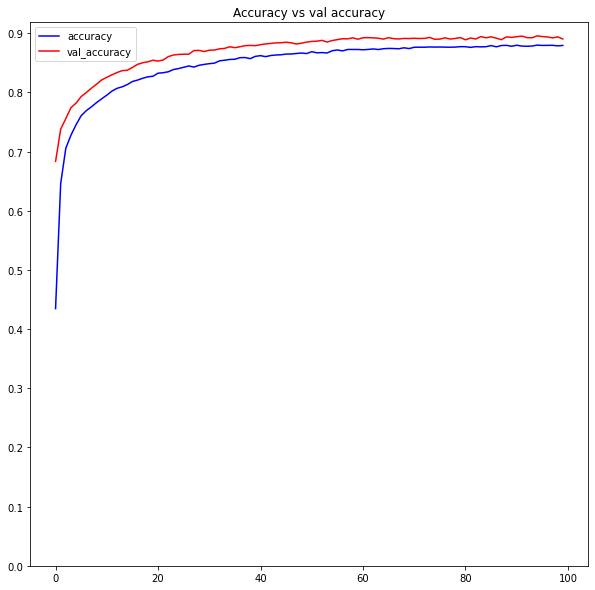

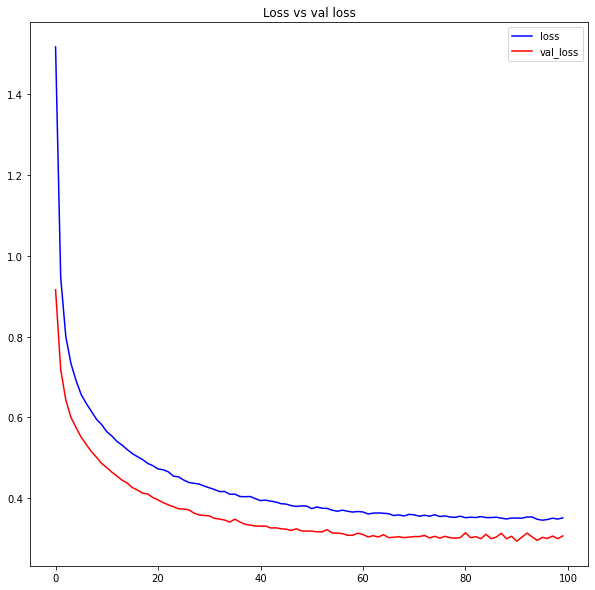

In [20]:
epochs = range(100)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.plot(epochs, accuracy, 'b', label='accuracy')
plt.plot(epochs, val_accuracy, 'r', label='val_accuracy')
plt.title('Accuracy vs val accuracy')
plt.legend()
plt.yticks(np.arange(0, 1, 0.1))
plt.show()


plt.figure(figsize=(10, 10))
plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'r', label='val_loss')
plt.title('Loss vs val loss')
plt.legend()
plt.show()

In [21]:
# Comprobamos la precisión del modelo generado
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8762


In [22]:
print(f'loss: {score[0]}')
print(f'accuracy: {score[1]}')

loss: 0.3364015519618988
accuracy: 0.8762000203132629


In [23]:
# Mostramos la matriz de confusión

y_pred = model.predict(X_test)

y_class = tf.argmax(y_pred, axis=1)

y_true = tf.concat([y for y in y_test], axis=0)

confusion_matrix(y_true, y_class)

array([[751,   1,  25,  27,   5,   1, 182,   0,   8,   0],
       [  1, 972,   2,  17,   1,   0,   5,   0,   2,   0],
       [  7,   0, 816,  11,  44,   1, 118,   0,   3,   0],
       [  8,   9,  21, 891,  26,   0,  44,   0,   1,   0],
       [  0,   1,  32,  29, 761,   0, 173,   0,   4,   0],
       [  0,   1,   0,   2,   0, 951,   1,  33,   0,  12],
       [ 76,   1,  65,  33,  64,   1, 741,   0,  19,   0],
       [  0,   0,   0,   0,   0,   7,   0, 976,   0,  17],
       [  0,   0,   3,   4,   1,   6,  11,   2, 971,   2],
       [  0,   0,   0,   0,   0,   6,   0,  59,   3, 932]])

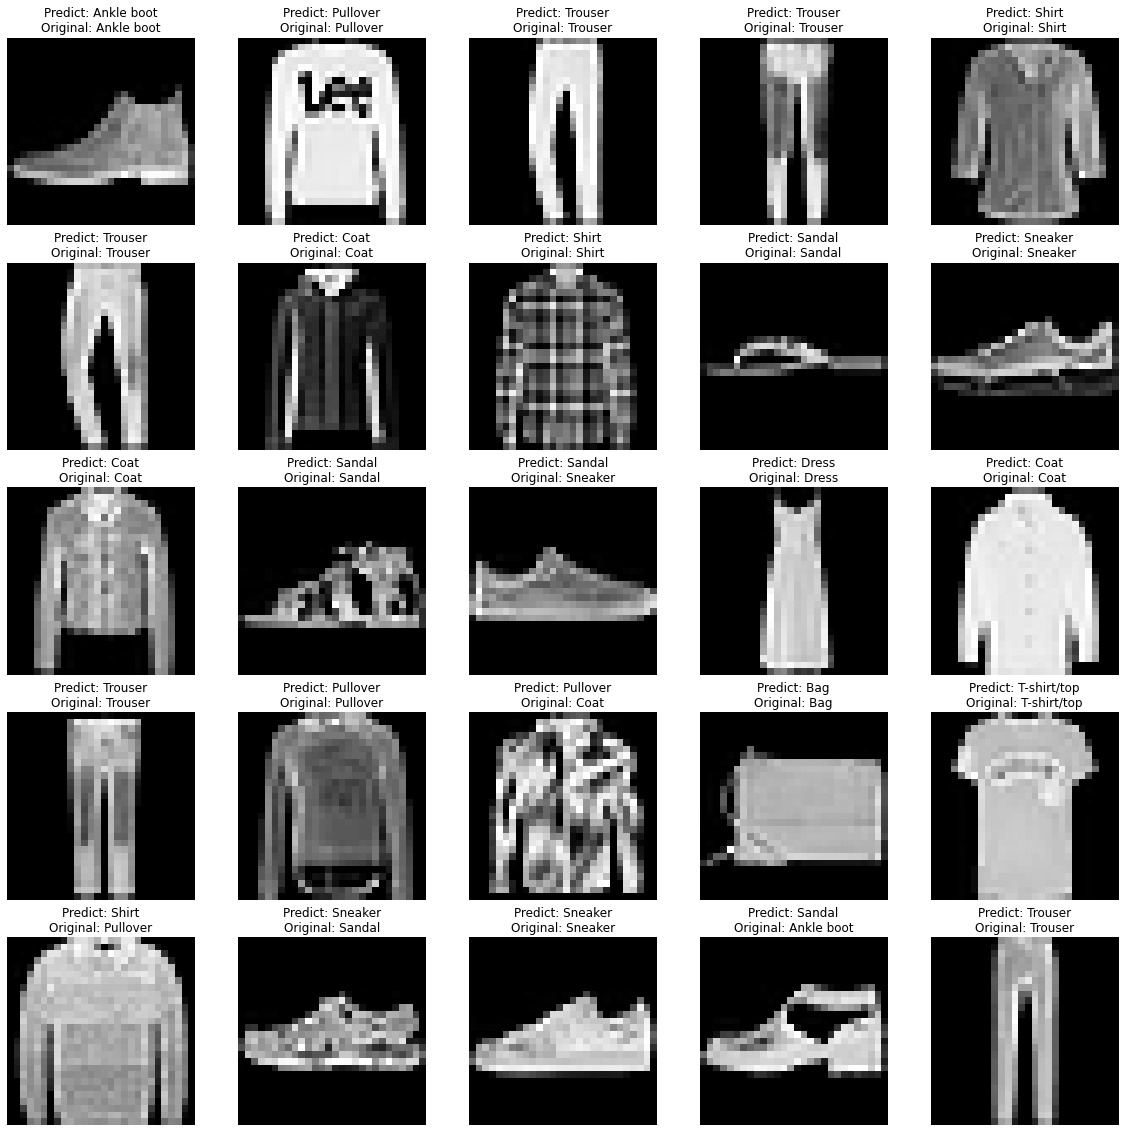

In [27]:
# Vamos a mostrar algunas de las predicciones

plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Predict: {class_names[y_class[i]]}\nOriginal: {class_names[y_test[i]]}")
    plt.axis(False)
plt.show()